In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from datetime import date
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.layers.core import Activation
from keras.layers import Bidirectional

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecate

In [2]:
def parser(x):
    # return datetime
    return datetime.strptime(x, '%m/%d/%Y')

# read the csv file
dataset = pd.read_csv("Brent_Weekly.csv", parse_dates=['Week of'], date_parser=parser)
dataset.head(10)

dataset = dataset.sort_values('Week of')
dataset = dataset.groupby('Week of')['Europe Brent Spot Price FOB  Dollars per Barrel'].sum().reset_index()
dataset.set_index('Week of', inplace=True)
dataset.head()

,Europe Brent Spot Price FOB Dollars per Barrel
Week of,
1987-05-15,18.58
1987-05-22,18.54
1987-05-29,18.60
1987-06-05,18.70
1987-06-12,18.75


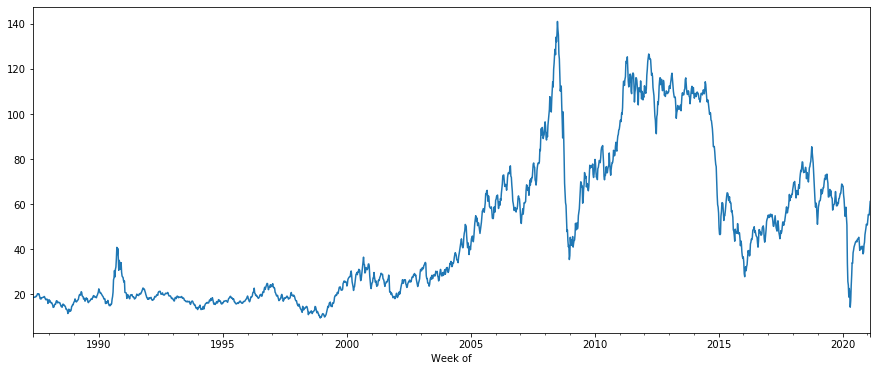

In [3]:
y = dataset['Europe Brent Spot Price FOB  Dollars per Barrel']
y.plot(figsize=(15, 6))
plt.show()

In [4]:
scaler = MinMaxScaler(feature_range = (0, 1))
df = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(df) * 0.75)
train, test = df[0:train_size, :], df[train_size:len(df), :]
valid_size = int(len(train) * 0.7)
train1, valid = train[0:valid_size, :], train[valid_size:len(train), :]

In [6]:
def create_data_set(dataset, n_steps = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - n_steps - 1):
        a = dataset[i:(i + n_steps), 0]
        data_x.append(a)
        data_y.append(dataset[i + n_steps, 0])
    return np.array(data_x), np.array(data_y)

In [7]:
n_steps = 2
n_features = 1
X_train,Y_train,X_test,Y_test,X_valid,Y_valid  = [],[],[],[],[],[]

X_train,Y_train=create_data_set(train1,n_steps)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

X_test,Y_test=create_data_set(test,n_steps)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

X_valid,Y_valid=create_data_set(valid,n_steps)
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], n_features))

In [8]:
model = Sequential()
model.add(LSTM(10, return_sequences = False, input_shape = (n_steps, n_features)))
# model.add(LSTM(50, return_sequences = True, input_shape = (n_steps, n_features)))
# model.add(LSTM(50, return_sequences = True))
# model.add(LSTM(50, return_sequences = False))
model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

call_back = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 30)
history = model.fit(X_train, Y_train, epochs = 1000, batch_size = 128, validation_data = (X_valid, Y_valid), callbacks = [call_back], shuffle = False)


Train on 921 samples, validate on 394 samples
Epoch 1/1000
921/921 [==============================] - 0s 324us/step - loss: 0.0064 - val_loss: 0.2157
Epoch 2/1000
921/921 [==============================] - 0s 22us/step - loss: 0.0040 - val_loss: 0.1926
Epoch 3/1000
921/921 [==============================] - 0s 18us/step - loss: 0.0025 - val_loss: 0.1728
Epoch 4/1000
921/921 [==============================] - 0s 17us/step - loss: 0.0018 - val_loss: 0.1568
Epoch 5/1000
921/921 [==============================] - 0s 22us/step - loss: 0.0016 - val_loss: 0.1445
Epoch 6/1000
921/921 [==============================] - 0s 21us/step - loss: 0.0017 - val_loss: 0.1357
Epoch 7/1000
921/921 [==============================] - 0s 22us/step - loss: 0.0018 - val_loss: 0.1296
Epoch 8/1000
921/921 [==============================] - 0s 22us/step - loss: 0.0019 - val_loss: 0.1255
Epoch 9/1000
921/921 [==============================] - 0s 22us/step - loss: 0.0019 - val_loss: 0.1227
Epoch 10/1000
921/921 [==

Epoch 76/1000
921/921 [==============================] - 0s 17us/step - loss: 1.9686e-04 - val_loss: 0.0024
Epoch 77/1000
921/921 [==============================] - 0s 19us/step - loss: 1.7037e-04 - val_loss: 0.0022
Epoch 78/1000
921/921 [==============================] - 0s 18us/step - loss: 2.2253e-04 - val_loss: 0.0020
Epoch 79/1000
921/921 [==============================] - 0s 16us/step - loss: 1.8857e-04 - val_loss: 0.0018
Epoch 80/1000
921/921 [==============================] - 0s 15us/step - loss: 2.1399e-04 - val_loss: 0.0016
Epoch 81/1000
921/921 [==============================] - 0s 17us/step - loss: 1.8683e-04 - val_loss: 0.0014
Epoch 82/1000
921/921 [==============================] - 0s 15us/step - loss: 1.8040e-04 - val_loss: 0.0013
Epoch 83/1000
921/921 [==============================] - 0s 18us/step - loss: 1.7425e-04 - val_loss: 0.0012
Epoch 84/1000
921/921 [==============================] - 0s 16us/step - loss: 1.7039e-04 - val_loss: 0.0012
Epoch 85/1000
921/921 [=====

In [9]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

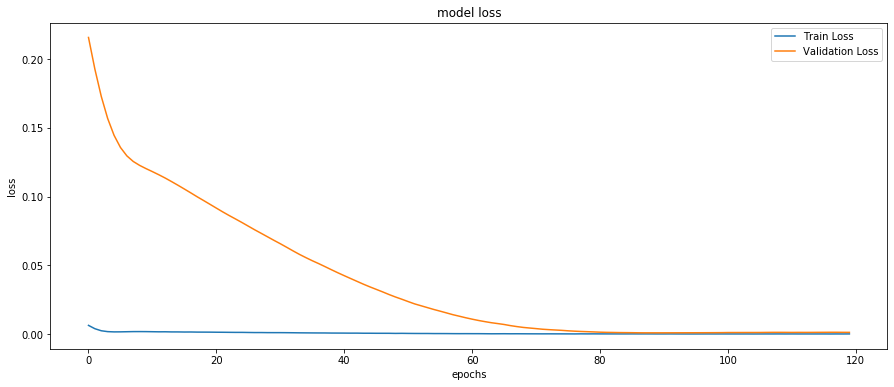

In [10]:
plt.figure(figsize = (15,6))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc = 'upper right')
plt.show();

In [11]:
# # invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

In [12]:
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Root Mean Squared Error: 1.2917353659330866
Test Root Mean Squared Error: 4.0007149400356266


In [13]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))

Train Mean Absolute Error: 0.8885347225922325
Test Mean Absolute Error: 3.0662237608051734


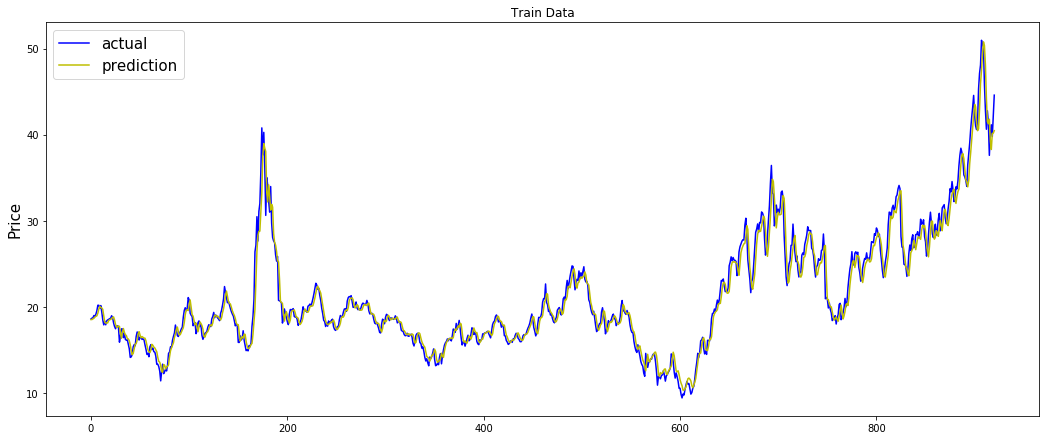

In [18]:
# Compare train data Actual vs. Prediction
plt.style.context("seaborn-white")
plt.figure(figsize=(15,6))
plt.plot(Y_train[0], 'b', label="actual")
plt.plot(train_predict, 'y', label="prediction")
plt.tight_layout()
plt.title('Train Data')
# sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.legend(fontsize=15)
plt.show();

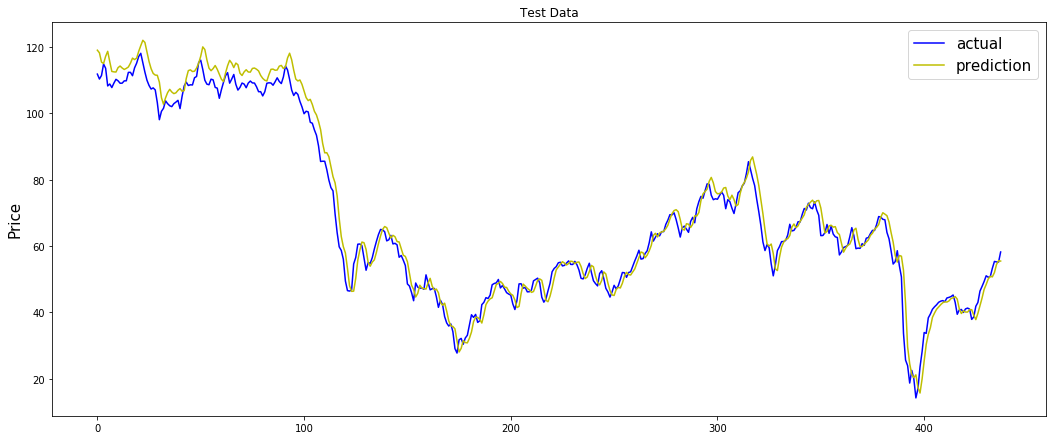

In [17]:
# Compare test data Actual vs. Prediction
plt.figure(figsize=(15,6))
plt.plot(Y_test[0], 'b', label="actual")
plt.plot(test_predict, 'y', label="prediction")
plt.tight_layout()
plt.title('Test Data')
# sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.legend(fontsize=15)
plt.show();